https://www.analyticsvidhya.com/blog/2019/10/detailed-guide-powerful-sift-technique-image-matching-python/#:~:text=SIFT%20helps%20locate%20the%20local,detection%2C%20scene%20detection%2C%20etc.

In [2]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread('data/images/discord1.png')  
img2 = cv2.imread('data/images/discord2.png') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


156


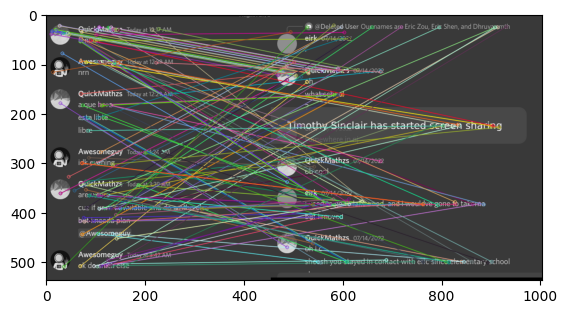

(<matplotlib.image.AxesImage at 0x7f01e46b0dc0>, None)

In [29]:
#sift
sift = cv2.xfeatures2d.SIFT_create()

keypoint1, des1 = sift.detectAndCompute(img1,None)
keypoint2, des2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
#bf = cv2.BFMatcher(cv2.NORM_L1)

# matches = bf.knnMatch(des1,des2,k=2)
# print(len(matches))

# topResults1 = []
# for m,n in matches:
#     if m.distance < 0.9*n.distance:
#         topResults1.append([m])
        
# matches = bf.knnMatch(des2,des1,k=2)
# topResults2 = []
# for m,n in matches:
#     if m.distance < 0.9*n.distance:
#         topResults2.append([m])

# topResults = []
# for match1 in topResults1:
#     match1QueryIndex = match1[0].queryIdx
#     match1TrainIndex = match1[0].trainIdx

#     for match2 in topResults2:
#         match2QueryIndex = match2[0].queryIdx
#         match2TrainIndex = match2[0].trainIdx

#         if (match1QueryIndex == match2TrainIndex) and (match1TrainIndex == match2QueryIndex):
#             topResults.append(match1)

matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

topResults = matches

print(len(topResults))

matchPlot = cv2.drawMatches(img1, keypoint1, img2, keypoint2, topResults, img2, flags=2)
# matchPlot = cv2.drawMatchesKnn(
#         img1,
#         keypoint1,
#         img2,
#         keypoint2,
#         topResults,
#         None,
#         [255,0,0],
#         flags=0
#     )
plt.imshow(matchPlot),plt.show()

469


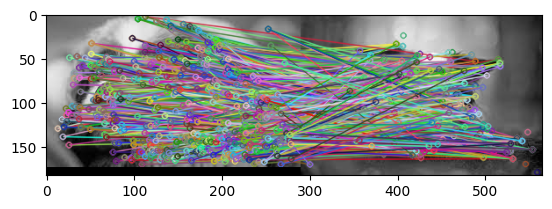

In [4]:
# check for similarities
sift = cv2.xfeatures2d.SIFT_create()
# check keypoints and descriptions of images
kp_1,desc_1 = sift.detectAndCompute(img1,None)
kp_2,desc_2 = sift.detectAndCompute(img2,None)

index_params = dict(algorithm=0, trees=5)
search_params = dict()
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(desc_1, desc_2, k=2)
result = cv2.drawMatchesKnn(img1,kp_1,img2,kp_2,matches,None)

print(len(matches))
plt.imshow(result)
# plt.imshow("Image 1", img1)img1 = cv2.imread('data/images/dog2.png')  
img2 = cv2.imread('data/images/dog3.png') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# plt.imshow("Image 2", img2)

138


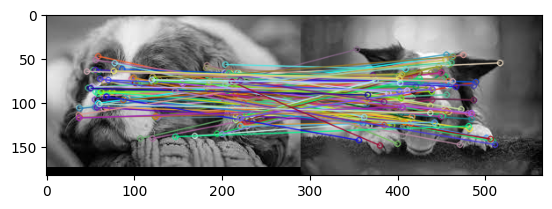

(<matplotlib.image.AxesImage at 0x7f78146af790>, None)

In [5]:
# Applying the function
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)
  
# Drawing the keypoints
#kp_image = cv2.drawKeypoints(img1, kp, None, color=(255, 255, 0), flags=0)

# matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
# knn_matches = matcher.knnMatch(des1, des2, k=2)

# #-- Filter matches using the Lowe's ratio test
# ratio_thresh = 0.7
# good_matches = []
# for m,n in knn_matches:
#     if m.distance < ratio_thresh * n.distance:
#         good_matches.append(m)

# matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
# cv2.drawMatches(img1, kp1, img2, kp2, good_matches, matches, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# print(len(matches))
# plt.imshow(result)

#plt.imshow(kp_image)
#plt.imshow(kp_image)
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

print(len(matches))

matchPlot = cv2.drawMatches(img1, kp1, img2, kp2, matches, img2, flags=2)
# matchPlot = cv2.drawMatchesKnn(
#         img1,
#         keypoint1,
#         img2,
#         keypoint2,
#         topResults,
#         None,
#         [255,0,0],
#         flags=0       
#     )
plt.imshow(matchPlot),plt.show()

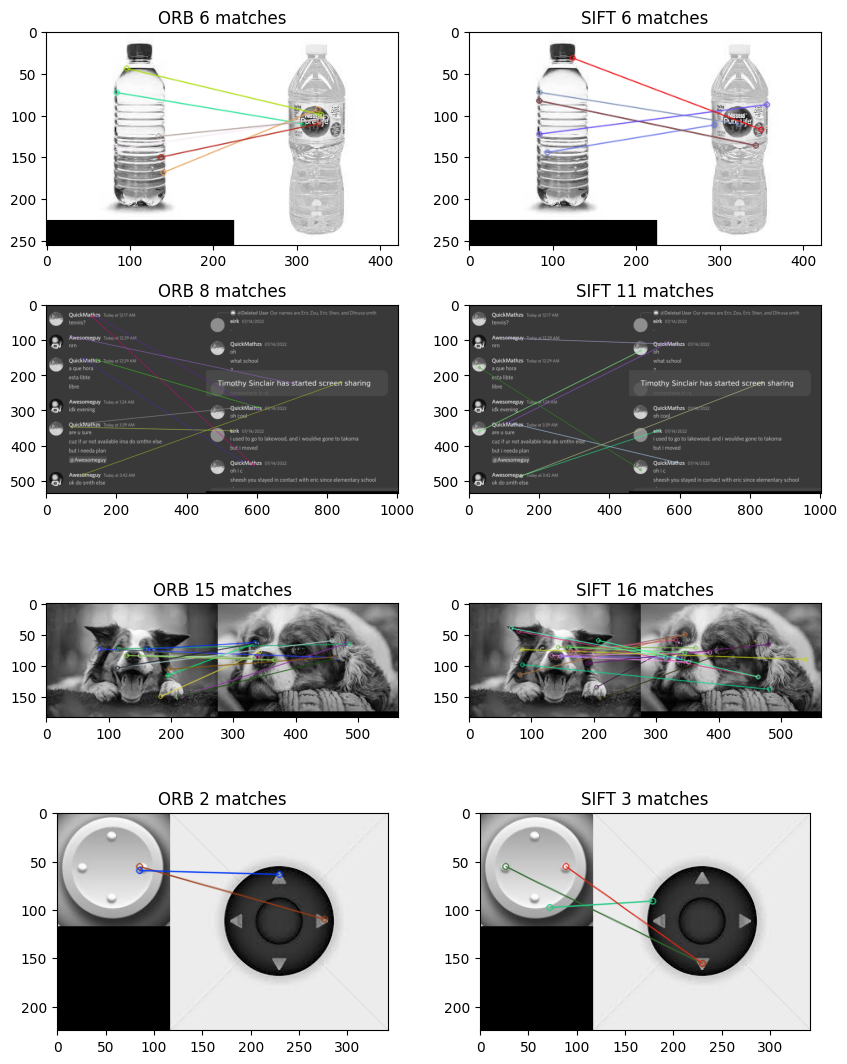

In [7]:
images = ["bottle", "discord", "dog", "joystick"]
fig = plt.figure(figsize=(10, 13))

orb = cv2.ORB_create(35)
sift = cv2.xfeatures2d.SIFT_create(35)

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

for i in range(len(images)):

    img1 = cv2.imread(f'data/images/{images[i]}1.png')  
    img2 = cv2.imread(f'data/images/{images[i]}2.png') 

    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    kp3, des3 = sift.detectAndCompute(img1, None)
    kp4, des4 = sift.detectAndCompute(img2, None)

    matches1 = bf.match(des1,des2)
    #matches1 = sorted(matches, key = lambda x:x.distance)
    # matches1 = []
    # for match in matches:
    #     m = match[0]
    #     n = match[1]
    #     if m.distance < 0.9*n.distance:
    #         matches1.append(match)

    matches2 = bf.match(des3,des4)
    #matches2 = sorted(matches, key = lambda x:x.distance)
    # matches2 = []
    # for match in matches:
    #     m = match[0]
    #     n = match[1]
    #     if m.distance < 0.9*n.distance:
    #         matches2.append(match)


    fig.add_subplot(4, 2, 1+2*i)
    matchPlot = cv2.drawMatches(img1, kp1, img2, kp2, matches1, img2, flags=2)
    plt.imshow(matchPlot)
    plt.title("ORB "+str(len(matches1)) + " matches")
    
    fig.add_subplot(4, 2, 2+2*i)
    matchPlot = cv2.drawMatches(img1, kp3, img2, kp4, matches2, img2, flags=2)
    plt.imshow(matchPlot)
    plt.title("SIFT "+str(len(matches2)) + " matches")
    

plt.show()  

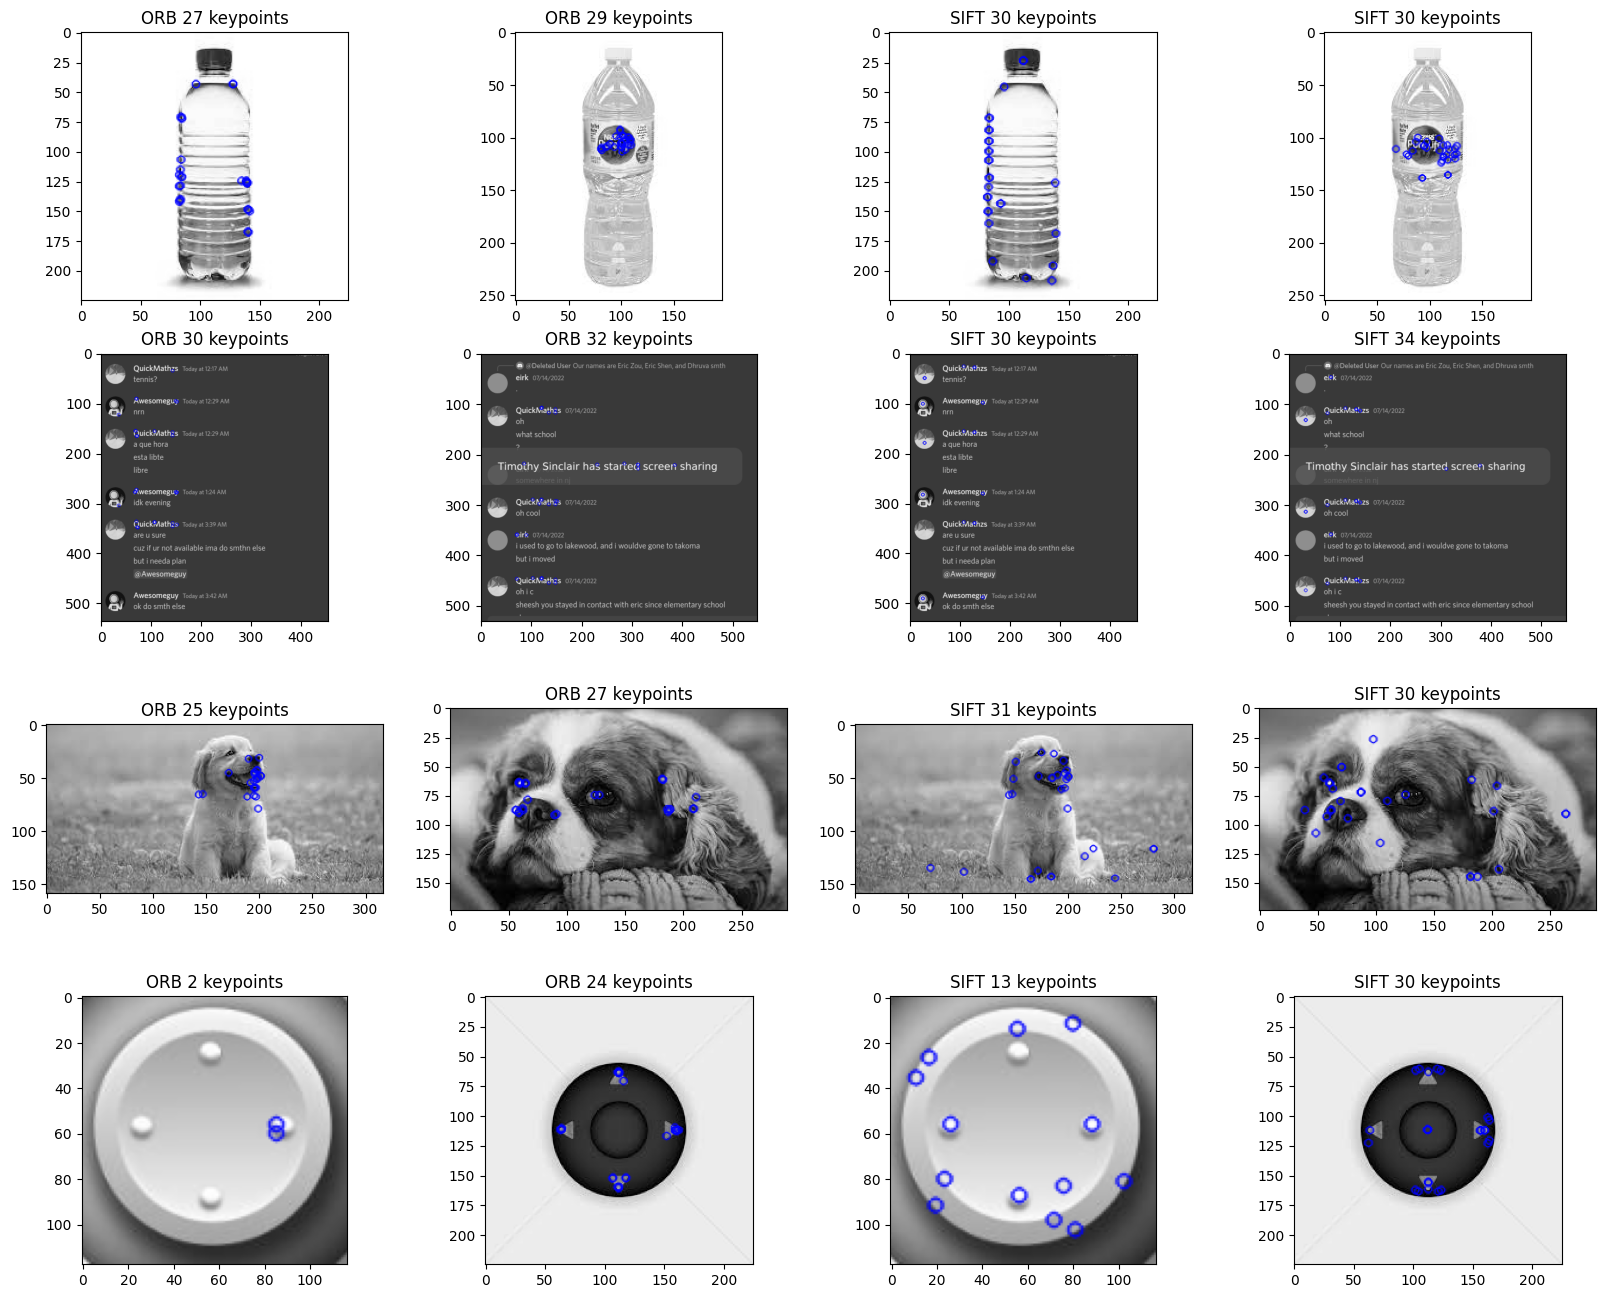

In [5]:
images = ["bottle", "discord", "dog", "joystick"]
fig = plt.figure(figsize=(20, 16))

orb = cv2.ORB_create(30)
sift = cv2.xfeatures2d.SIFT_create(30)

for i in range(len(images)):

    img1 = cv2.imread(f'data/images/{images[i]}1.png')  
    img2 = cv2.imread(f'data/images/{images[i]}2.png') 

    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    kp3, des3 = sift.detectAndCompute(img1, None)
    kp4, des4 = sift.detectAndCompute(img2, None)

    out1 = cv2.drawKeypoints(img1, kp1, 0, (0, 0, 255),
                                    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

    out2 = cv2.drawKeypoints(img2, kp2, 0, (0, 0, 255),
                                    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

    out3 = cv2.drawKeypoints(img1, kp3, 0, (0, 0, 255),
                                    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

    out4 = cv2.drawKeypoints(img2, kp4, 0, (0, 0, 255),
                                    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
    
    fig.add_subplot(4, 4, 1+4*i)
    plt.imshow(out1)
    plt.title("ORB "+str(len(kp1)) + " keypoints")

    fig.add_subplot(4, 4, 2+4*i)
    plt.imshow(out2)
    plt.title("ORB " + str(len(kp2)) + " keypoints")

    fig.add_subplot(4, 4, 3+4*i)
    plt.imshow(out3)
    plt.title("SIFT " + str(len(kp3)) + " keypoints")

    fig.add_subplot(4, 4, 4+4*i)
    plt.imshow(out4)
    plt.title("SIFT " + str(len(kp4)) + " keypoints")
    

plt.show()  